# Project 2: Fraud Detection Analysis (Random Forest)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
outlier_fraction

0.0017304750013189597

In [8]:
#Fraud case
len(data[data['Class'] == 1])

492

In [10]:
#Valid Case
len(data[data['Class'] == 0])

284315

In [9]:
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


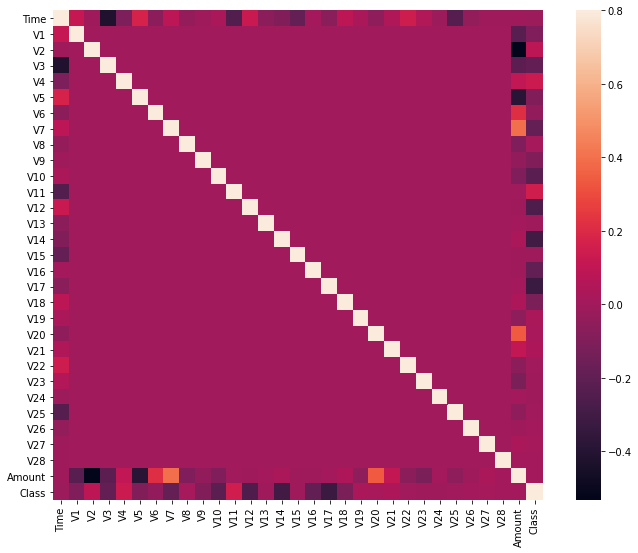

In [11]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
#seperating the X and the y from the dataset
X=data.drop(['Class'], axis=1)
y=data["Class"]
print(X.shape)
print(y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
y_data=y.values

(284807, 30)
(284807,)


In [14]:
X_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [18]:
#Spliting data into training and testing sets into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [21]:
#Isolation Forest Classifier
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)


# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != y_test).sum()

the Model used is Isolation Forest
The accuracy is  0.9979459990871107
The precision is 0.38823529411764707
The recall is 0.336734693877551
The F1-Score is 0.36065573770491804
The Matthews correlation coefficient is0.3605460930519415


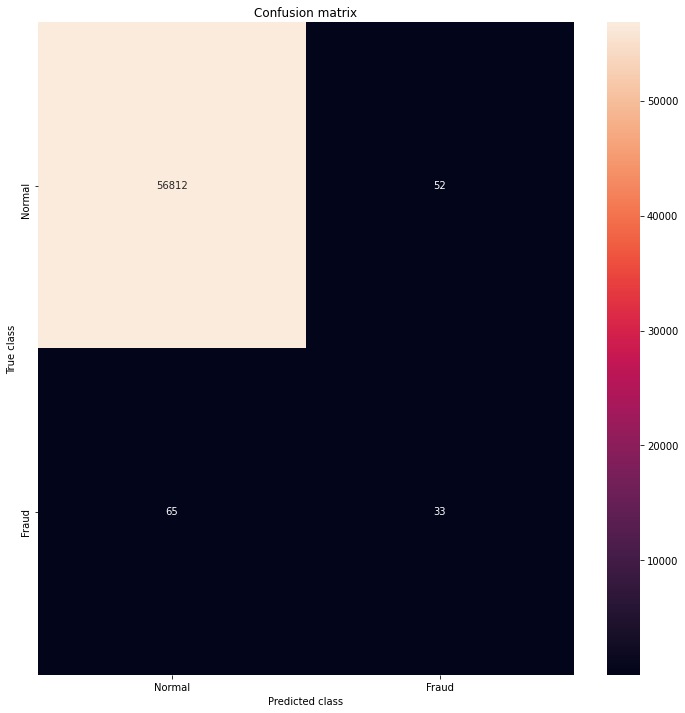

Isolation Forest: 117
0.9979459990871107
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.34      0.36        98

    accuracy                           1.00     56962
   macro avg       0.69      0.67      0.68     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 648x504 with 0 Axes>

In [23]:
#evaluation of the model
#printing every score of the classifier
#scoring in any thing

from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [24]:
#Random Forest Classifier
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

The model used is Random Forest classifier
The accuracy is  0.9996137776061234
The precision is 0.9871794871794872
The recall is 0.7857142857142857
The F1-Score is 0.8750000000000001
The Matthews correlation coefficient is 0.8805302991855358


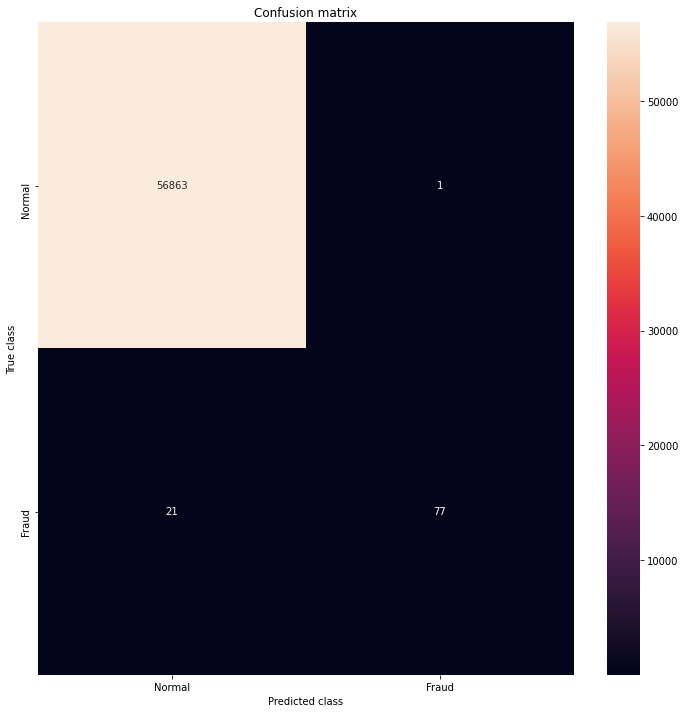

Random Forest: 22
0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 648x504 with 0 Axes>

In [25]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))


#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Conclusion: 
In a Isolation Forest : The precision is 0.38823529411764707 and The recall is 0.336734693877551 are 
low but near close to each other But
In Random Forest:  The precision is 0.9871794871794872 and The recall is 0.7857142857142857 are both and having huge 
diffirence in between.